In [1]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

In [20]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g, consensus, steps
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
    print('Len:', len(g))
    print('Con:', consensus)
        
def update():
    global g, consensus, steps
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    for i in g.nodes:
        if g.nodes[i]['state'] == 1:
            consensus += 1
    
    steps += 1
    
def run():
    global consensus, steps
    while consensus < len(g):
        update()

#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, run()])

In [23]:
times = []

for i in range(100):
    consensus = 0
    steps = 0
    initialize()
    run()
    #observe()
    times.append(steps)

[2, 3, 3, 3, 4, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 4, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 3, 3, 4, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2]


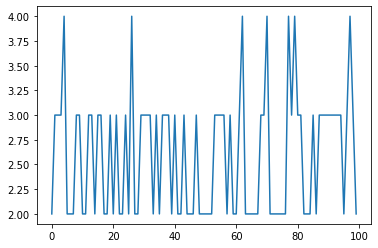

In [24]:
print(times)
plt.plot(times)

### Reverse voter model

In [25]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g, consensus, steps
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
    print('Len:', len(g))
    print('Con:', consensus)
        
def update():
    global g, consensus, steps
    # Swap the variables names in the code above
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    for i in g.nodes:
        if g.nodes[i]['state'] == 1:
            consensus += 1
    
    steps += 1
    
def run():
    global consensus, steps
    while consensus < len(g):
        update()

In [26]:
times = []

for i in range(100):
    consensus = 0
    steps = 0
    initialize()
    run()
    #observe()
    times.append(steps)

[2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3]


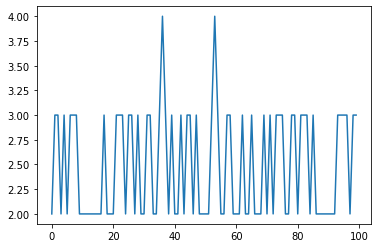

In [27]:
print(times)
plt.plot(times)

### Edge-based voter model

In [ ]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g, consensus, steps
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
    print('Len:', len(g))
    print('Con:', consensus)
        
def update():
    global g, consensus, steps
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    for i in g.nodes:
        if g.nodes[i]['state'] == 1:
            consensus += 1
    
    steps += 1
    
def run():
    global consensus, steps
    while consensus < len(g):
        update()

In [ ]:
times = []

for i in range(100):
    consensus = 0
    steps = 0
    initialize()
    run()
    #observe()
    times.append(steps)

In [ ]:
print(times)
plt.plot(times)

### EPIDEMIC MODEL

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx

def initialize():
    global g, nextg
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0
    nextg = g.copy()
    nextg.pos = g.pos

def observe():
    global g, nextg
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g, nextg
    for i in g.nodes:
        count = g.nodes[i]['state']
        for j in g.neighbors(i):
            count += g.nodes[j]['state']
        ratio = count / (g.degree[i] + 1.0)
        nextg.nodes[i]['state'] = 1 if ratio > .5 \
                                  else 0 if ratio < .5 \
                                  else 1 if random() < .5 else 0
    g, nextg = nextg, g

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])